In [166]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
raw_df = pd.read_csv('Data/fabrizioromanoherewego.csv')

In [169]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        120 non-null    int64  
 1   text                           120 non-null    object 
 2   post_text                      120 non-null    object 
 3   shared_text                    0 non-null      float64
 4   original_text                  0 non-null      float64
 5   time                           120 non-null    object 
 6   timestamp                      120 non-null    int64  
 7   image                          114 non-null    object 
 8   image_lowquality               120 non-null    object 
 9   images                         120 non-null    object 
 10  images_description             120 non-null    object 
 11  images_lowquality              120 non-null    object 
 12  images_lowquality_description  120 non-null    obj

In [170]:
raw_df.describe()

,post_id,shared_text,original_text,timestamp,video_duration_seconds,video_height,video_id,video_quality,video_size_MB,video_watches,...,factcheck,shared_post_id,shared_time,shared_user_id,shared_username,shared_post_url,reaction_count,page_id,sharers,image_id
count,1.200000e+02,0.0,0.0,1.200000e+02,0.0,0.0,3.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,120.000000,1.200000e+02,0.0,1.130000e+02
mean,9.505735e+14,NaN,NaN,1.701115e+09,NaN,NaN,7.595873e+14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,59203.091667,1.145898e+14,NaN,9.505516e+14
std,7.866216e+11,NaN,NaN,1.113913e+05,NaN,NaN,4.110669e+14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,60706.913514,0.000000e+00,NaN,7.810976e+11
min,9.493145e+14,NaN,NaN,1.700927e+09,NaN,NaN,3.734852e+14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5458.000000,1.145898e+14,NaN,9.493145e+14
25%,9.498830e+14,NaN,NaN,1.701017e+09,NaN,NaN,5.435107e+14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,29069.250000,1.145898e+14,NaN,9.498794e+14
50%,9.504762e+14,NaN,NaN,1.701102e+09,NaN,NaN,7.135362e+14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,39501.500000,1.145898e+14,NaN,9.504491e+14
75%,9.512522e+14,NaN,NaN,1.701207e+09,NaN,NaN,9.526384e+14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,61289.250000,1.145898e+14,NaN,9.512127e+14
max,9.521348e+14,NaN,NaN,1.701333e+09,NaN,NaN,1.191741e+15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,484000.000000,1.145898e+14,NaN,9.521348e+14


In [171]:
raw_df.tail(5)

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,w3_fb_url,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,fetched_time
115,949353396992152,Who’s gonna finish 𝐡𝐢𝐠𝐡𝐞𝐫 in PL? 👀✨,Who’s gonna finish 𝐡𝐢𝐠𝐡𝐞𝐫 in PL? 👀✨,NaN,NaN,2023-11-26 00:05:35,1700931935,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,['https://m.facebook.com/photo/view_full_size/...,...,NaN,NaN,42000,NaN,114589756608819,NaN,9.493534e+14,['949353370325488'],False,NaN
116,949335846993907,One more 3-0 win for Bayer 🔴⚫️🇩🇪\n\nXabi Alons...,One more 3-0 win for Bayer 🔴⚫️🇩🇪\n\nXabi Alons...,NaN,NaN,2023-11-25 23:28:44,1700929724,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan2-3.fna.fbcdn.net/v/t39...,...,NaN,NaN,87000,NaN,114589756608819,NaN,9.493358e+14,['949335800327245'],False,NaN
117,949333873660771,Chelsea are 3-1 down vs Newcastle now! ⚪️⚫️,Chelsea are 3-1 down vs Newcastle now! ⚪️⚫️,NaN,NaN,2023-11-25 23:24:41,1700929481,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...,['https://m.facebook.com/photo/view_full_size/...,...,NaN,NaN,39000,NaN,114589756608819,NaN,9.493338e+14,['949333826994109'],False,NaN
118,949329466994545,🔵🔴🇧🇷 Barça director Deco: “It has not yet been...,🔵🔴🇧🇷 Barça director Deco: “It has not yet been...,NaN,NaN,2023-11-25 23:15:28,1700928928,https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...,https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan2-4.fna.fbcdn.net/v/t39...,...,NaN,NaN,30000,NaN,114589756608819,NaN,9.493295e+14,['949329450327880'],False,NaN
119,949314523662706,🚨🔴 Klopp: “We lost Diogo Jota with a muscle bu...,🚨🔴 Klopp: “We lost Diogo Jota with a muscle bu...,NaN,NaN,2023-11-25 22:43:00,1700926980,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan2-3.fna.fbcdn.net/v/t39...,...,NaN,NaN,38000,NaN,114589756608819,NaN,9.493145e+14,['949314503662708'],False,NaN


In [172]:
raw_df['time'] = pd.to_datetime(raw_df['time'])

In [173]:
df = raw_df[['time','timestamp' ,'reaction_count']]
df

,time,timestamp,reaction_count
0,2023-11-30 15:30:55,1701333055,5458
1,2023-11-30 14:30:21,1701329421,29110
2,2023-11-30 08:23:21,1701307401,35794
3,2023-11-30 05:27:09,1701296829,95055
4,2023-11-30 05:00:00,1701295200,59112
...,...,...,...
115,2023-11-26 00:05:35,1700931935,42000
116,2023-11-25 23:28:44,1700929724,87000
117,2023-11-25 23:24:41,1700929481,39000
118,2023-11-25 23:15:28,1700928928,30000


In [174]:
df['time'] = pd.to_datetime(df['time'])

df['date'] = df['time'].dt.date
df['time'] = df['time'].dt.time

df = df[::-1].reset_index(drop=True)


C:\Users\Laptop VINHLINK\AppData\Local\Temp\ipykernel_7204\2096917023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_datetime(df['time'])
C:\Users\Laptop VINHLINK\AppData\Local\Temp\ipykernel_7204\2096917023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['time'].dt.date
C:\Users\Laptop VINHLINK\AppData\Local\Temp\ipykernel_7204\2096917023.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [175]:
raw_df[['post_id', 'reactions']].head(10)

,post_id,reactions
0,952134820047343,"{'like': 4592, 'love': 776, 'haha': 25, 'wow':..."
1,952112546716237,"{'like': 21995, 'love': 6480, 'haha': 119, 'wo..."
2,951976760063149,"{'like': 25947, 'love': 689, 'haha': 8586, 'wo..."
3,951909296736562,"{'like': 71563, 'love': 21626, 'haha': 154, 'w..."
4,951897683404390,"{'like': 49187, 'love': 9093, 'haha': 83, 'wow..."
5,951869110073914,"{'like': 155731, 'love': 47615, 'haha': 279, '..."
6,951818136745678,"{'like': 61611, 'love': 12683, 'haha': 69, 'wo..."
7,951806140080211,"{'like': 19981, 'love': 1279, 'haha': 21, 'wow..."
8,951790760081749,"{'like': 48025, 'love': 7393, 'haha': 528, 'wo..."
9,951787750082050,"{'like': 114339, 'love': 27384, 'haha': 983, '..."


In [176]:
raw_df['reactions'] = raw_df['reactions'].apply(lambda x: eval(x) if isinstance(x, str) else x)
df_reactions = raw_df['reactions'].apply(pd.Series)
df_reactions.head()


,like,love,haha,wow,care,angry,sad,0
0,4592.0,776.0,25.0,8.0,57.0,NaN,NaN,NaN
1,21995.0,6480.0,119.0,15.0,500.0,1.0,NaN,NaN
2,25947.0,689.0,8586.0,57.0,92.0,272.0,151.0,NaN
3,71563.0,21626.0,154.0,57.0,1646.0,7.0,2.0,NaN
4,49187.0,9093.0,83.0,61.0,649.0,17.0,22.0,NaN


In [177]:
df_reactions = df_reactions.drop(df_reactions.columns[-1], axis=1)

df_reactions['reactions_count'] = df['reaction_count'].iloc[::-1].reset_index(drop=True)

for i in range (df_reactions.shape[0]):
    if pd.isna(df_reactions['like'].iloc[i]):
        df_reactions['like'].iloc[i] = (df_reactions['reactions_count'].iloc[i] * 0.75).round()
    if pd.isna(df_reactions['love'].iloc[i]):
        df_reactions['love'].iloc[i] = (df_reactions['reactions_count'].iloc[i] * 0.15).round()
    
df_reactions['haha'].fillna(df_reactions['haha'].median(), inplace=True)
df_reactions['wow'].fillna(df_reactions['wow'].median(), inplace=True)
df_reactions['care'].fillna(df_reactions['care'].median(), inplace=True)
df_reactions['angry'].fillna(df_reactions['angry'].median(), inplace=True)
df_reactions['sad'].fillna(df_reactions['sad'].median(), inplace=True)

df_reactions


C:\Users\Laptop VINHLINK\AppData\Local\Temp\ipykernel_7204\3637342539.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reactions['like'].iloc[i] = (df_reactions['reactions_count'].iloc[i] * 0.75).round()
C:\Users\Laptop VINHLINK\AppData\Local\Temp\ipykernel_7204\3637342539.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reactions['love'].iloc[i] = (df_reactions['reactions_count'].iloc[i] * 0.15).round()
C:\Users\Laptop VINHLINK\AppData\Local\Temp\ipykernel_7204\3637342539.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

,like,love,haha,wow,care,angry,sad,reactions_count
0,4592.0,776.0,25.0,8.0,57.0,6.0,8.0,5458
1,21995.0,6480.0,119.0,15.0,500.0,1.0,8.0,29110
2,25947.0,689.0,8586.0,57.0,92.0,272.0,151.0,35794
3,71563.0,21626.0,154.0,57.0,1646.0,7.0,2.0,95055
4,49187.0,9093.0,83.0,61.0,649.0,17.0,22.0,59112
...,...,...,...,...,...,...,...,...
115,31500.0,6300.0,119.0,37.0,234.0,6.0,8.0,42000
116,65250.0,13050.0,119.0,37.0,234.0,6.0,8.0,87000
117,29250.0,5850.0,119.0,37.0,234.0,6.0,8.0,39000
118,22500.0,4500.0,119.0,37.0,234.0,6.0,8.0,30000


In [178]:
df_reactions = pd.concat([raw_df, df_reactions], axis=1).drop('reactions', axis=1)
df_reactions[['time','post_text','like','love','haha','wow','care','angry','sad',
                                 'shares','comments','reaction_count']]

,time,post_text,like,love,haha,wow,care,angry,sad,shares,comments,reaction_count
0,2023-11-30 15:30:55,🔴⚪️ Arteta on Havertz moment: “He’s becoming b...,4592.0,776.0,25.0,8.0,57.0,6.0,8.0,15,220,5458
1,2023-11-30 14:30:21,⚪️✨ Nico Páz: “This is a dream! I didn't know ...,21995.0,6480.0,119.0,15.0,500.0,1.0,8.0,111,649,29110
2,2023-11-30 08:23:21,🔴 Ten Hag: “I am responsible for this. This is...,25947.0,689.0,8586.0,57.0,92.0,272.0,151.0,295,5200,35794
3,2023-11-30 05:27:09,⚪️ Nico Páz after scoring his first goal for R...,71563.0,21626.0,154.0,57.0,1646.0,7.0,2.0,718,1200,95055
4,2023-11-30 05:00:00,Who’s your Man of the UCL Night? 😮‍💨,49187.0,9093.0,83.0,61.0,649.0,17.0,22.0,1000,3400,59112
...,...,...,...,...,...,...,...,...,...,...,...,...
115,2023-11-26 00:05:35,Who’s gonna finish 𝐡𝐢𝐠𝐡𝐞𝐫 in PL? 👀✨,31500.0,6300.0,119.0,37.0,234.0,6.0,8.0,167,1800,42000
116,2023-11-25 23:28:44,One more 3-0 win for Bayer 🔴⚫️🇩🇪\n\nXabi Alons...,65250.0,13050.0,119.0,37.0,234.0,6.0,8.0,534,1100,87000
117,2023-11-25 23:24:41,Chelsea are 3-1 down vs Newcastle now! ⚪️⚫️,29250.0,5850.0,119.0,37.0,234.0,6.0,8.0,182,3500,39000
118,2023-11-25 23:15:28,🔵🔴🇧🇷 Barça director Deco: “It has not yet been...,22500.0,4500.0,119.0,37.0,234.0,6.0,8.0,47,183,30000


Thống kê thời gian thu thập dữ liệu

In [179]:
start_date = df['date'].min().strftime('%Y-%m-%d')
end_date = df['date'].max().strftime('%Y-%m-%d')

print('Start date: ' + start_date)
print('End date: ' + end_date)

Start date: 2023-11-25
End date: 2023-11-30


Thống kê tổng số Reactions theo ngày

In [180]:

df_date_ = raw_df.groupby(raw_df['time'].dt.day)[['reaction_count','shares','comments']].sum()
df_date_

,reaction_count,shares,comments
time,,,
25,194000,879,5187
26,1770000,25347,53869
27,1943241,9017,47032
28,1093783,8387,22626
29,1338022,6360,34879
30,765325,7256,20988


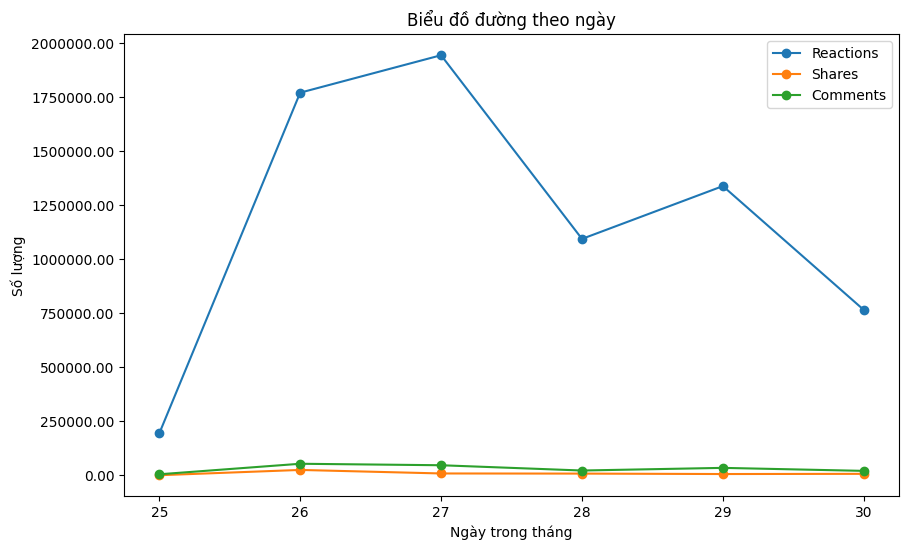

In [181]:

from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df_date_.index, df_date_['reaction_count'], label='Reactions', marker='o')
ax.plot(df_date_.index, df_date_['shares'], label='Shares', marker='o')
ax.plot(df_date_.index, df_date_['comments'], label='Comments', marker='o')

ax.set_xlabel('Ngày trong tháng')
ax.set_ylabel('Số lượng')
ax.set_title('Biểu đồ đường theo ngày')

ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax.legend()

plt.show()

Thống kê về từng loại reactions theo ngày

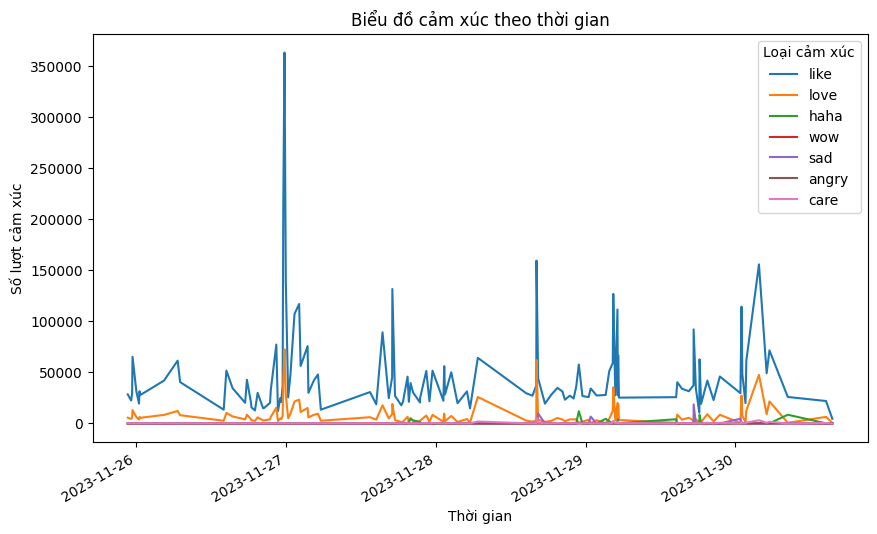

In [182]:
df_emotions = df_reactions[['time', 'like', 'love', 'haha', 'wow', 'sad', 'angry', 'care']]


df_emotions.set_index('time', inplace=True)

df_emotions.plot( figsize=(10, 6))
plt.title('Biểu đồ cảm xúc theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượt cảm xúc')
plt.legend(title='Loại cảm xúc')

plt.show()


Thống kê số post được đăng theo từng khung giờ trong ngày

In [183]:
df

,time,timestamp,reaction_count,date
0,22:43:00,1700926980,38000,2023-11-25
1,23:15:28,1700928928,30000,2023-11-25
2,23:24:41,1700929481,39000,2023-11-25
3,23:28:44,1700929724,87000,2023-11-25
4,00:05:35,1700931935,42000,2023-11-26
...,...,...,...,...
115,05:00:00,1701295200,59112,2023-11-30
116,05:27:09,1701296829,95055,2023-11-30
117,08:23:21,1701307401,35794,2023-11-30
118,14:30:21,1701329421,29110,2023-11-30


In [184]:
raw_df['post_hour'] = raw_df['time'].dt.hour

df_hour = raw_df.groupby('post_hour').size()

df_hour

post_hour
0     11
1      9
2      3
3      6
4      5
5     10
6      2
7      1
8      1
13     1
14     7
15     5
16     5
17     9
18     8
19     7
20     6
21     6
22     7
23    11
dtype: int64

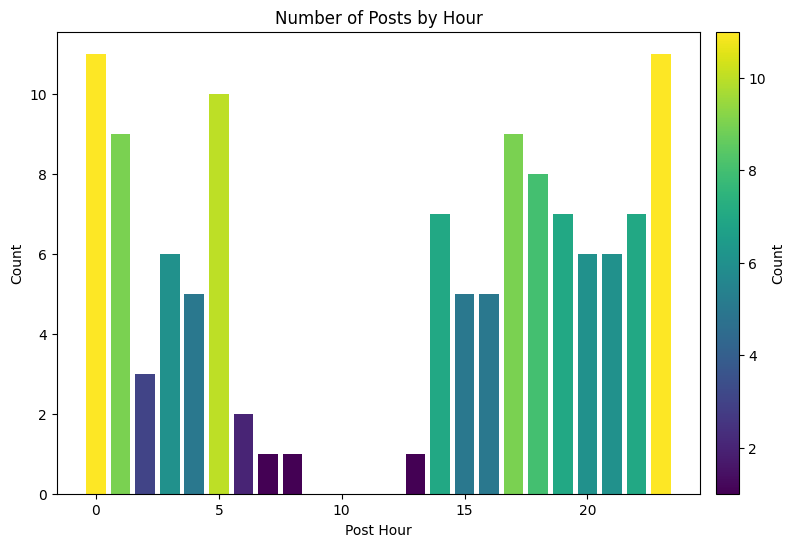

In [185]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

norm = Normalize(vmin=df_hour.min(), vmax=df_hour.max())

colormap = plt.cm.viridis

sm = ScalarMappable(cmap=colormap, norm=norm)

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(df_hour.index, df_hour, color=colormap(norm(df_hour)))

# Set labels and title
ax.set_xlabel('Post Hour')
ax.set_ylabel('Count')
ax.set_title('Number of Posts by Hour')

cbar = plt.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label('Count')

plt.show()


In [186]:
hour_with_max_post = df_hour.idxmax()
max_post_count = df_hour.max()

hour_with_min_post = df_hour.idxmin()
min_post_count = df_hour.min()

print(f"Thời gian có ít bài post nhất vào: {hour_with_min_post}h với {min_post_count} post")

print(f"Thời gian có nhiều bài post nhất vào: {hour_with_max_post}h với {max_post_count} post")

Thời gian có ít bài post nhất vào: 7h với 1 post
Thời gian có nhiều bài post nhất vào: 0h với 11 post


Thống kê tổng số reactions của các post được đăng theo từng khung giờ trong ngày

In [194]:
df_hour_reactions = df_reactions[['time', 'like', 'love', 'haha', 'wow', 'sad', 'angry', 'care', 'reaction_count', 'comments', 'shares']]
df_hour_reactions['post_hour'] = df_hour_reactions['time'].dt.hour
df_hour_reactions

C:\Users\Laptop VINHLINK\AppData\Local\Temp\ipykernel_7204\2429715170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hour_reactions['post_hour'] = df_hour_reactions['time'].dt.hour


,time,like,love,haha,wow,sad,angry,care,reaction_count,comments,shares,post_hour
0,2023-11-30 15:30:55,4592.0,776.0,25.0,8.0,8.0,6.0,57.0,5458,220,15,15
1,2023-11-30 14:30:21,21995.0,6480.0,119.0,15.0,8.0,1.0,500.0,29110,649,111,14
2,2023-11-30 08:23:21,25947.0,689.0,8586.0,57.0,151.0,272.0,92.0,35794,5200,295,8
3,2023-11-30 05:27:09,71563.0,21626.0,154.0,57.0,2.0,7.0,1646.0,95055,1200,718,5
4,2023-11-30 05:00:00,49187.0,9093.0,83.0,61.0,22.0,17.0,649.0,59112,3400,1000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
115,2023-11-26 00:05:35,31500.0,6300.0,119.0,37.0,8.0,6.0,234.0,42000,1800,167,0
116,2023-11-25 23:28:44,65250.0,13050.0,119.0,37.0,8.0,6.0,234.0,87000,1100,534,23
117,2023-11-25 23:24:41,29250.0,5850.0,119.0,37.0,8.0,6.0,234.0,39000,3500,182,23
118,2023-11-25 23:15:28,22500.0,4500.0,119.0,37.0,8.0,6.0,234.0,30000,183,47,23


In [197]:
cols = ['like', 'love', 'haha', 'wow', 'sad', 'angry', 'care','reaction_count', 'comments', 'shares']
df_hour_reactions = df_hour_reactions.groupby("post_hour")[cols].sum()


AttributeError: 'DataFrameGroupBy' object has no attribute 'groupby'

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[int32]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[int32]'>)

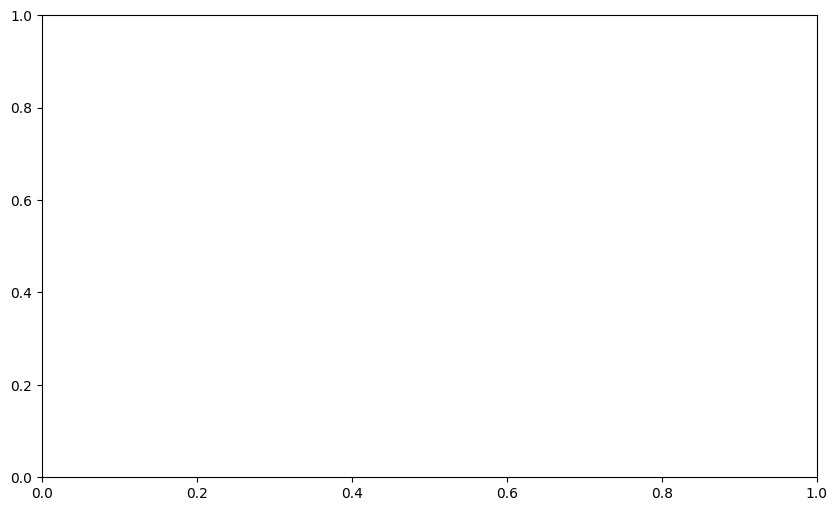

In [190]:
# Tạo biểu đồ
fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ biểu đồ
df_hour_reactions.plot(kind='area', ax=ax)

# Đảm bảo số liệu không được viết tắt trên trục y
ax.get_yaxis().get_major_formatter().set_scientific(False)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ cảm xúc theo từng khung giờ')
plt.xlabel('Thời gian (giờ)')
plt.ylabel('Tổng số reactions')

plt.show()

Simple Linear Regression model to predict number of reactions depending on comments and shares 

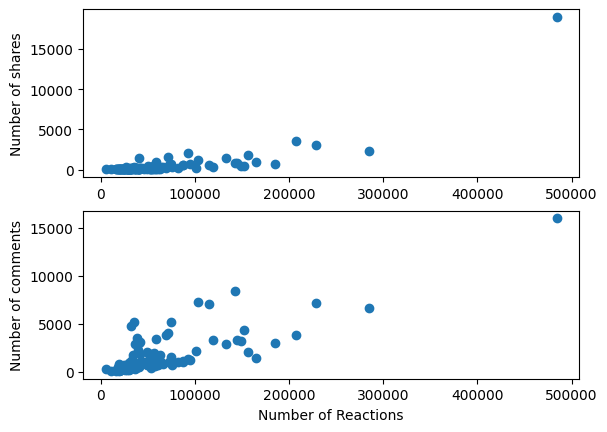

In [ ]:
x = raw_df['reaction_count']
y = raw_df['shares']
z = raw_df['comments']
plt.subplot(2,1,1)
plt.scatter(X, y)
plt.ylabel('Number of shares')

plt.subplot(2,1,2)
plt.scatter(X, z)
plt.xlabel('Number of Reactions')
plt.ylabel('Number of comments')
plt.show()

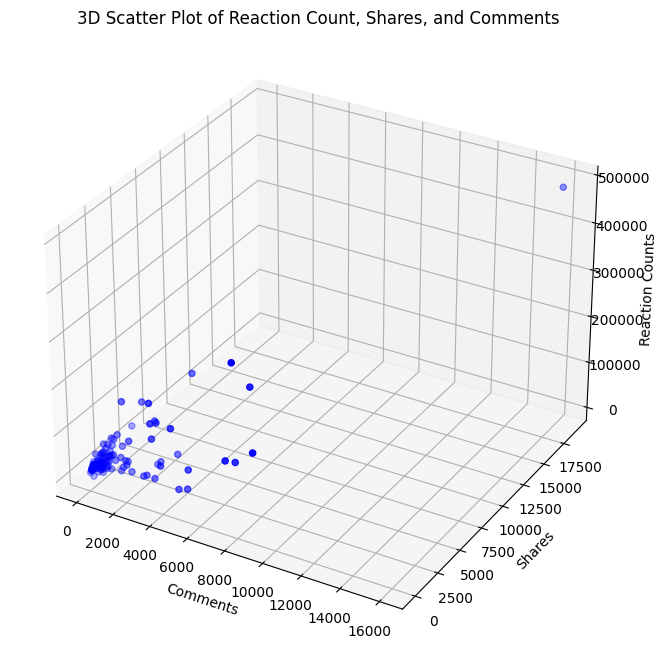

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'raw_df' is your DataFrame
x = raw_df['reaction_count']
y = raw_df['shares']
z = raw_df['comments']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(z, y, x, c='blue', marker='o')

ax.set_xlabel('Comments')
ax.set_ylabel('Shares')
ax.set_zlabel('Reaction Counts')

plt.title('3D Scatter Plot of Reaction Count, Shares, and Comments')
plt.show()


In [ ]:
Y = np.array(x)
Y.reshape(120,1)
Y.shape

(120,)

In [ ]:
y = np.array(y)
z = np.array(z)
X = np.vstack((y, z)).T

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=3)

In [ ]:

from sklearn.linear_model import LinearRegression

my_model = LinearRegression()

my_model.fit(X_train, Y_train)



LinearRegression()

In [ ]:
y_pred = my_model.predict(X_test)

In [ ]:
my_model.score(X_test, Y_test)

0.6806481811811911

Sentiment Analysis - Phân tích quan điểm 